In [1]:
import pandas as pd
import numpy as np
import json
from datetime import date
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
artist_df = pd.read_csv('./data/artists.csv')
tracks_df = pd.read_csv('./data/tracks.csv')
with open("./data/dict_artists.json", encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)

In [3]:
tracks_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [4]:
df = tracks_df.copy()

df['release_date'] = pd.to_datetime(df['release_date'])

In [61]:
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021


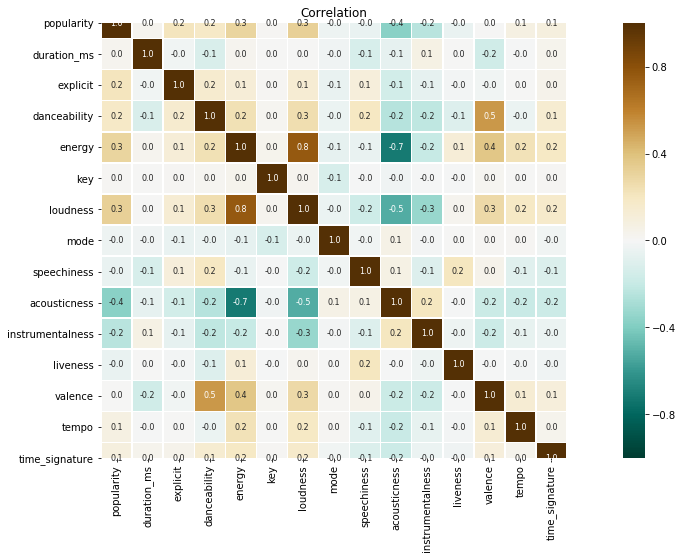

In [12]:
corr = df.corr()
# visualizing correlaiton with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,linewidth=.5,square=True, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='BrBG_r')
plt.title('Correlation')
plt.show()

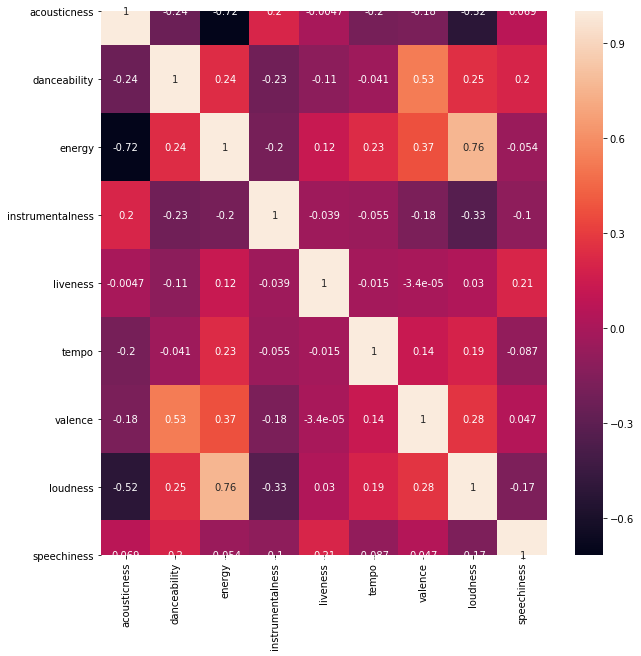

In [20]:
corr = df[["acousticness","danceability","energy", "instrumentalness", 
           "liveness","tempo", "valence", "loudness", "speechiness"]]

plt.figure(figsize=(10,10))
sns.heatmap(corr.corr(), annot=True)

In [18]:
df['year'] = df.apply(lambda row: row.release_date.year, axis = 1)

In [24]:
year_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year"]].\
groupby("year").mean().sort_values(by="year").reset_index()

year_avg.head()

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness
0,1900,0.139000,0.659000,0.791000,0.000002,0.161000,141.999000,0.956000,-4.895000,0.029500
1,1922,0.898857,0.533320,0.324054,0.324971,0.250670,109.120405,0.563605,-13.953241,0.246295
2,1923,0.859965,0.637332,0.266977,0.157659,0.225396,109.552648,0.671967,-16.351921,0.552072
3,1924,0.866266,0.593344,0.356725,0.339628,0.203447,119.457894,0.554935,-13.290367,0.375208
4,1925,0.912170,0.617391,0.263749,0.275384,0.255157,113.901050,0.635196,-14.977595,0.305693


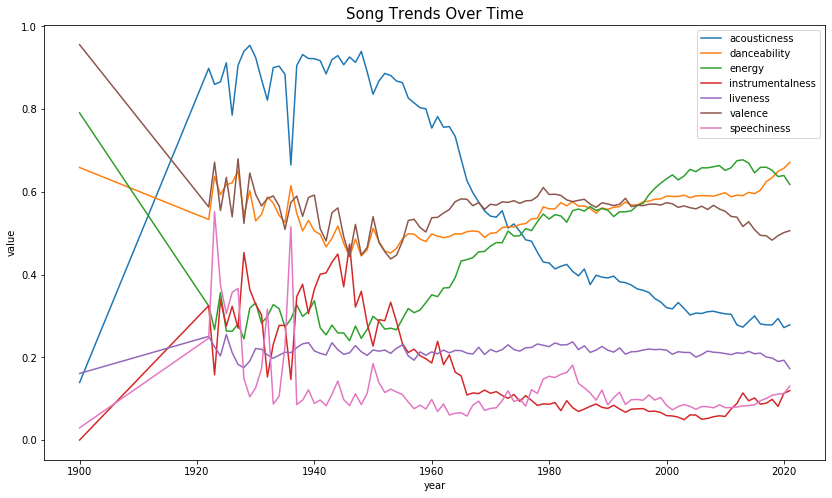

In [22]:
plt.figure(figsize=(14,8))
plt.title("Song Trends Over Time", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

In [28]:
final_df = df.sort_values(by=['popularity'], ascending=False)

In [32]:
artist_final = artist_df.sort_values(by=['popularity'], ascending=False)
artist_final.head(20)

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
115489,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
144484,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"['k-pop', 'k-pop boy group']",BTS,96
115490,4MCBfE4596Uoi2O4DtmEMz,16996777.0,"['chicago rap', 'melodic rap']",Juice WRLD,96
144483,1Xyo4u8uXC1ZmMpatF05PJ,31308207.0,"['canadian contemporary r&b', 'canadian pop', ...",The Weeknd,96
144485,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"['pop', 'post-teen pop']",Ariana Grande,95
144486,1vyhD5VmyZ7KMfW5gqLgo5,27286822.0,"['latin', 'reggaeton', 'reggaeton colombiano',...",J Balvin,95
115491,7iK8PXO48WeuP03g8YR51W,5001808.0,['trap latino'],Myke Towers,95


In [62]:
# x = []
# y = []
# for k, name in enumerate(artist_final['name']):
#     y.append(artist_final['popularity'][k])
#     year = final_df[final_df['name'] == name].year.iloc[0]
#     x.append(year)
# plt.scatter(x, y)

In [76]:
# name = artist_final['name'].iloc[0]
counts = df["artists"].value_counts()

['Die drei ???']                   3856
['TKKG Retro-Archiv']              2006
['Benjamin Blümchen']              1503
['Bibi Blocksberg']                1472
['Lata Mangeshkar']                1373
                                   ... 
['High Tone', 'Pupajim']              1
['Stella Getz']                       1
['Jaspreet Jasz', 'Rita']             1
['RHYMESTER', 'Maki the Magic']       1
['Haricharan', 'Sruthi']              1
Name: artists, Length: 114030, dtype: int64

In [83]:
df_artists = df[df.artists.isin(counts)][["artists","year"]].\
groupby(["artists","year"]).size().reset_index(name="song_count")

df_artists.head()

,artists,year,song_count


In [37]:
artist_final = artist_df.sort_values(by=['popularity'], ascending=False)
temp = artist_final['genres'][artist_final['genres'] != '[]']
temp.head(5)

144481             ['canadian pop', 'pop', 'post-teen pop']
115489                ['latin', 'reggaeton', 'trap latino']
126338                             ['pop', 'post-teen pop']
313676    ['canadian hip hop', 'canadian pop', 'hip hop'...
144484                         ['k-pop', 'k-pop boy group']
Name: genres, dtype: object

In [44]:
top_genres = {}
# temp.iloc[0][1:-1].replace("'", '').split(',')
for genre_list in temp:
    genre_list = genre_list[1:-1].replace("'", '').split(',')
    for genre in genre_list:
        if genre not in top_genres:
            top_genres[genre] = 1
        else:
            top_genres[genre] += 1

In [57]:
top_genres = {k: v for k, v in sorted(top_genres.items(), key=lambda item: item[1], reverse=True)}
import pickle

with open('top_genres.pkl', 'wb') as handle:
    pickle.dump(top_genres, handle, protocol=pickle.HIGHEST_PROTOCOL)